<a href="https://colab.research.google.com/github/astrapi69/DroidBallet/blob/master/MLG_D2_LC1_Regression_with_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- ds ft -->
<center><a target="_blank" href="https://academy.constructor.org/"><img src="https://jobtracker.ai/static/media/constructor_academy_colour.b86fa87f.png" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>

_____

<center> <h1> Regression with Gradient Descent (Live coding) </h1> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center>Constructor Academy, 2024</center>

# Regression with Gradient Descent (Live coding)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(suppress=True)

In [5]:
plt.rcParams["figure.figsize"] = (12, 6)  # Change matplotlib Box Size
plt.rcParams["font.size"] = 14  # Change matplotlib Font Size
plt.style.use("seaborn-v0_8")

## Import Data

In [6]:
# Salary_Data.csv
gdrive_data_url = "https://drive.google.com/file/d/1MVd9IS6f92Xpl8c84z8-MSd-3QeIo2kN/view?usp=share_link"
file_id = gdrive_data_url.split('/')[-2]
data_file='https://drive.google.com/uc?export=download&id=' + file_id
data = pd.read_csv(data_file)
data.head()

,YearsExperience,Salary
0,1.1000,39343.0000
1,1.3000,46205.0000
2,1.5000,37731.0000
3,2.0000,43525.0000
4,2.2000,39891.0000


Let's have a short look at the data first:

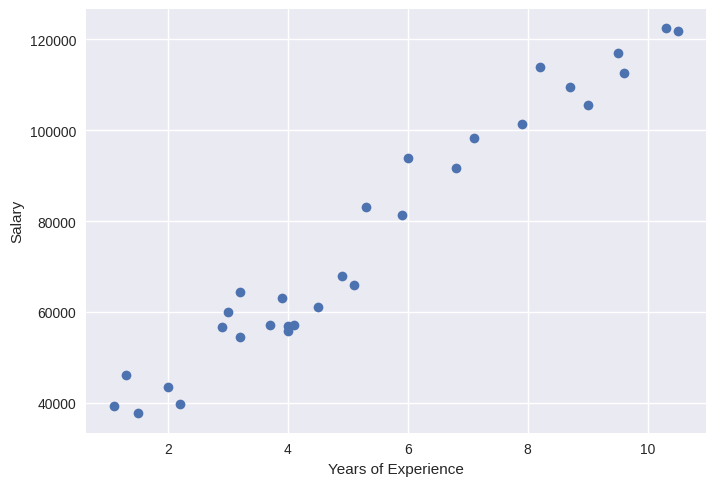

In [7]:
plt.plot(data["YearsExperience"], data["Salary"], "o")
plt.xlabel("Years of Experience")
plt.ylabel("Salary");

## Linear regression - General concept
A linear model assumes that the relationship between the dependent variable y and the our features x is linear and thus takes the form:

$y_i = \beta_{0} + \beta_{1} x_{i1} + \cdots + \beta_{p} x_{ip} + \varepsilon_i,
 \qquad i = 1, \ldots, n$


### Matrix notation

We can simplify the notation by adding a first column with a constant to $X$.

In particular,  ${\displaystyle \mathbf {x} _{i0}=1}$ for ${\displaystyle i=1,\ldots ,n}$. The corresponding element $\beta_0$ is called the intercept.

Then the previous formula can be written more compact in matrix notation as:

$\mathbf{y} = X\boldsymbol\beta + \boldsymbol\varepsilon$

where

${\displaystyle \mathbf {y} ={\begin{pmatrix}y_{1}\\y_{2}\\\vdots \\y_{n}\end{pmatrix}},\quad }
{\displaystyle X={\begin{pmatrix}\mathbf {x} _{1}^{\mathsf {T}}\\\mathbf {x} _{2}^{\mathsf {T}}\\\vdots \\\mathbf {x} _{n}^{\mathsf {T}}\end{pmatrix}}={\begin{pmatrix}1&x_{11}&\cdots &x_{1p}\\1&x_{21}&\cdots &x_{2p}\\\vdots &\vdots &\ddots &\vdots \\1&x_{n1}&\cdots &x_{np}\end{pmatrix}},}$


${\displaystyle {\boldsymbol {\beta }}={\begin{pmatrix}\beta _{0}\\\beta _{1}\\\beta _{2}\\\vdots \\\beta _{p}\end{pmatrix}},\quad}
{{\boldsymbol {\varepsilon }}={\begin{pmatrix}\varepsilon _{1}\\\varepsilon _{2}\\\vdots \\\varepsilon _{n}\end{pmatrix}}.}$

- $\mathbf {y}$
 is a vector of observed values
${\displaystyle y_{i}\ (i=1,\ldots ,n)}$
 of the variable called the regressand, endogenous variable or dependent variable. In our case this is the salary.

- ${\boldsymbol\displaystyle X}$ is a matrix of row-vectors ${\displaystyle \mathbf {x} _{i}}$ called independent variable and contains the features of our data points. In our case this is the years of experience.

- $\boldsymbol\varepsilon$ is called error term, disturbance term, or sometimes noise. This variable captures all other factors which influence the dependent variable y other than the regressors x.

- $\boldsymbol\beta$ is a vector of the regression coefficients.


 https://en.wikipedia.org/wiki/Linear_regression

## Extract dependent and independent variables
We create a NumPy vector of our independent variable and a NumPy array of our independent variable.

Add a column full of ones to $X$ so that $x_{i0}=1$  for $i=1,\ldots ,n$. The corresponding element $\beta_0$ is called the intercept or bias.

In [8]:
y = data[['Salary']].values

X = data[['YearsExperience']].values
# add x0 = 1 to each instance (row) for intercept
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [9]:
X[:5]

array([[1. , 1.1],
       [1. , 1.3],
       [1. , 1.5],
       [1. , 2. ],
       [1. , 2.2]])

In [10]:
y[:5]

array([[39343.],
       [46205.],
       [37731.],
       [43525.],
       [39891.]])

What you mainly need is the formula for calculating the cost function $J(\boldsymbol\theta)$ and its derivative:

$J(\boldsymbol\beta) = \frac{1}{n} (\hat  {\mathbf y} − \mathbf{y})^T (\hat  {\mathbf y} − \mathbf{y})
= \frac{1}{n} (X\boldsymbol \beta − \mathbf{y})^T (X\boldsymbol \beta − \mathbf{y})$

$\nabla_\beta J(\boldsymbol\beta) = \frac{2}{n} X^T (X\boldsymbol \beta − \mathbf{y}) = \frac{2}{n} X^T ( \hat  {\mathbf y} − \mathbf{y})$


For making mathematical operations simpler we usually divide and multiply by a constant 2 as follows:

$J(\boldsymbol\beta) = \frac{1}{2n} (\hat  {\mathbf y} − \mathbf{y})^T (\hat  {\mathbf y} − \mathbf{y})
= \frac{1}{2n} (X\boldsymbol \beta − \mathbf{y})^T (X\boldsymbol \beta − \mathbf{y})$

$\nabla_\beta J(\boldsymbol\beta) = \frac{1}{n} X^T (X\boldsymbol \beta − \mathbf{y}) = \frac{1}{n} X^T ( \hat  {\mathbf y} − \mathbf{y})$

For a detailed derivation of the gradient in matrix notation check this lecture notes:

http://mccormickml.com/2014/03/04/gradient-descent-derivation/


## Define Utility Functions

Here we start by defining some utility functions

In [11]:
# function to predict using linear regression coefficients and features
def predict(X , beta):
    """
    :param X: feature matrix including column of ones for bias
    :return: result of the linear regression

    returns y_pred = X , beta
    """
    return np.dot(X, beta)

In [12]:
#  we actually don't need the cost function itself for gradient descent
#  but it is nice to see how to translate the math to code ;)
def calc_cost(X, y, beta):
    """
    :param X: feature matrix including column of ones for bias
    :param y: labels
    :param beta: regression coefficients
    :return: return cost
    """
    n = len(y)
    y_hat = predict(X, beta)
    return 1 / (2 * n) * np.sum(np.square((y - y_hat)))

In [13]:
# what we need is the gradient
# this consists of the partial derivatives of the cost function
def calc_gradient(X, y, beta):
    """
    :param X: feature matrix including column of ones for bias
    :param y: labels
    :param beta: regression coefficients
    :return: gradient
    """
    n = len(y)
    y_hat = predict(X, beta)
    grad = 1 / n * np.dot(X.T, (y_hat - y))
    return grad

In [14]:
# the whole point of gradient descent is to update the coefficients (betas)
# we use a learning rate to update the coefficients using the current gradient
def update_betas(beta, gradient, learning_rate=0.1):
    """
    :param beta: regression coefficient vector
    :param gradient: gradient vector
    :param learning_rate: learning rate for updating beta
    :return: updated beta vector of coefficients
    """
    return beta - learning_rate * gradient

In [15]:
# shows the mathematical way to compute rmse
# you can also use functions from sklearn if needed
def calc_rmse(y, y_hat):
    """
    :param y: vector of observed values
    :param y_hat: vector of estimated (predicted) values
    :return: root mean squared error (RMSE)
    """
    return np.sqrt(np.sum(np.square(y_hat - y)) / len(y))

Let's play a bit with beta to see what effect it has on our linear model:

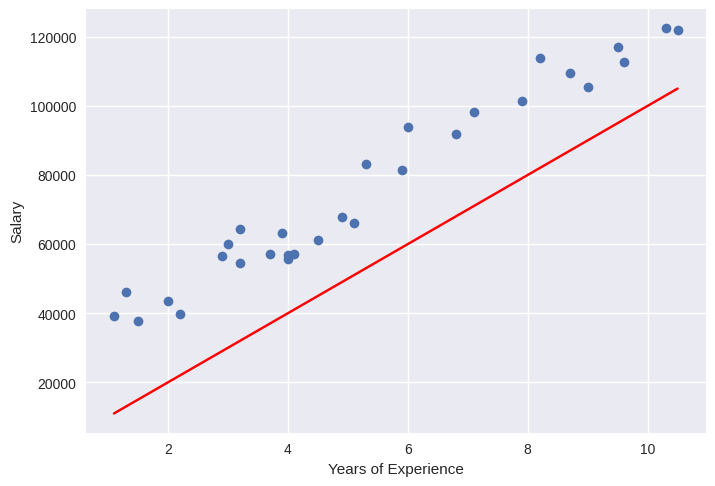

In [16]:
#  try different values and please keep in mind, that for the further calculations beta should be a column vector
beta = np.array([[0],  # intercept
                 [10000]]) # beta (coefficient)

plt.plot(X[:, 1], y, "o")
plt.plot(X[:, 1], predict(X, beta), c="red")
plt.xlabel("Years of Experience")
plt.ylabel("Salary");

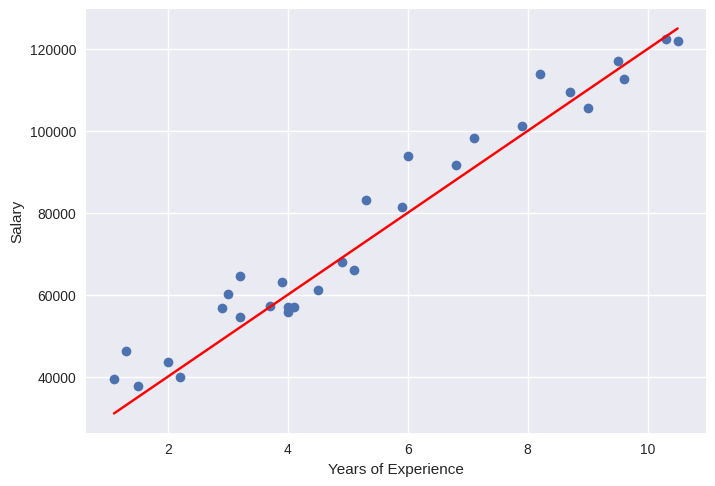

In [17]:
#  try different values and please keep in mind, that for the further calculations beta should be a column vector
beta = np.array([[20000],  # intercept
                 [10000]]) # beta (coefficient)

plt.plot(X[:, 1], y, "o")
plt.plot(X[:, 1], predict(X, beta), c="red")
plt.xlabel("Years of Experience")
plt.ylabel("Salary");

## Gradient Descent

We start by defining a function to put all the above functions together to do gradient descent

In [18]:
def gradient_descent(X, y, beta=None, learning_rate=0.01):
    """
    :param X: feature matrix including column of ones for bias
    :param y: independent variable
    :param learning_rate: learning rate for gradient descent
    :param beta: regression coefficients
    :return:
        - beta - updated regression coefficients
        - y_hat - estimated y
        - rmse - Root mean squared errors
    """
    grad = calc_gradient(X, y, beta)
    beta = update_betas(beta, grad, learning_rate)
    y_hat = predict(X, beta)
    rmse = calc_rmse(y, y_hat)

    return beta, y_hat, rmse

Build a function which can run gradient descent iteratively multiple times

In [19]:
def run_gradient_descent_epochs(gradient_descent_func,
                                X, y, learning_rate=0.01,
                                epochs=100, beta=None,
                                verbose=True, create_plot=True,
                                step_width_output=100):
    """
    :param X: feature matrix including column of ones for bias
    :param y: independent variable
    :param learning_rate: learning rate for gradient descent
    :param epochs: number of iterations
    :param beta: regression coefficients

    :param verbose: print intermediate results
    :return:
        - beta_all - numpy array containing regression coefficients of all gradient descent steps
        - rmse_all - numpy array containing RMSE values of all gradient descent steps
    """

    # set missing parameters to default values
    if not beta:
        # Creates random start values for beta (coefficients)
        beta = np.random.rand(X.shape[1], 1)
    assert X.shape[1] == len(beta), "Check the shape of variables beta and X_b"
    assert X.shape[0] == y.shape[0], "Check the shape of variables X_b and y"

    # initialize arrays for storing intermediate results
    # for large arrays this is computational way more efficient than appending
    rmse_all = np.zeros(epochs + 1)  # vector for saving RMSE values
    rmse_all[0] = calc_rmse(y, predict(X, beta))  # insert current RMSE based on prediction

    beta_all = np.zeros((epochs + 1, len(beta)))  # array for storing beta vectors
    beta_all[0, :] = beta.T  #  insert current beta (coefficient) values

    # if you want to display results in the notebook
    if verbose:
        print("Epoch: {:4d}, RMSE: {:8.3f}, beta: {}".format(0, rmse_all[0], beta.T))
    if create_plot:
        fig, axs = plt.subplots(1, 3, figsize=(32, 6))
        axs[0].plot(X[:, 1], y, "b.")
    else:
        axs = None

    # main loop for iterative gradient descent
    for epoch in range(epochs):
        # call gradient descent function
        beta, y_hat, rmse = gradient_descent_func(X, y, beta, learning_rate)

        # add new values to arrays i.e the betas and RMSE values
        beta_all[epoch + 1, :] = beta.T  # Add new beta vector to array
        rmse_all[epoch + 1] = rmse  # Add new RMSE to vector

        if verbose and (epoch + 1) % step_width_output == 0:
            print(
                "Epoch: {:4d}, RMSE: {:8.3f}, beta: {}".format(epoch + 1, rmse, beta.T)
            )
        if create_plot and (epoch + 1) % step_width_output == 0:
            axs[0].plot(X[:, 1], y_hat, "r-", alpha=epoch / epochs)

    if verbose:
        print("")
    if create_plot:
        axs[0].set_xlabel("Years of Experience")
        axs[0].set_ylabel("Salary")
        axs[1].plot(rmse_all, label="training loss")
        axs[1].legend(loc="best")
        axs[1].set_ylabel("RMSE")
        axs[1].set_xlabel("Epoch")
        axs[1].grid()
        axs[2].scatter(beta_all[:, 0], beta_all[:, 1], c=range(beta_all.shape[0]), cmap='RdYlGn')
        axs[2].set_xlabel(r"$\beta_0$")
        axs[2].set_ylabel(r"$\beta_1$")

    return beta_all, rmse_all, axs

Epoch:    0, RMSE: 80635.748, beta: [[0.16850559 0.84392261]]
Epoch:  100, RMSE: 10577.428, beta: [[ 6481.95175784 12315.52234621]]
Epoch:  200, RMSE: 9167.953, beta: [[10166.94767251 11768.68438   ]]
Epoch:  300, RMSE: 8113.517, beta: [[13148.73177026 11326.20010336]]
Epoch:  400, RMSE: 7341.532, beta: [[15561.49873433 10968.15558713]]
Epoch:  500, RMSE: 6788.679, beta: [[17513.83472916 10678.43709911]]
Epoch:  600, RMSE: 6400.881, beta: [[19093.60430223 10444.00590829]]
Epoch:  700, RMSE: 6133.700, beta: [[20371.90471292 10254.31147905]]
Epoch:  800, RMSE: 5952.270, beta: [[21406.26565252 10100.81664605]]
Epoch:  900, RMSE: 5830.419, beta: [[22243.23835819  9976.61340058]]
Epoch: 1000, RMSE: 5749.238, beta: [[22920.49064334  9876.11199683]]
Epoch: 1100, RMSE: 5695.458, beta: [[23468.50213123  9794.78938632]]
Epoch: 1200, RMSE: 5659.968, beta: [[23911.9359851   9728.98565888]]
Epoch: 1300, RMSE: 5636.610, beta: [[24270.74886971  9675.739329  ]]
Epoch: 1400, RMSE: 5621.264, beta: [[245

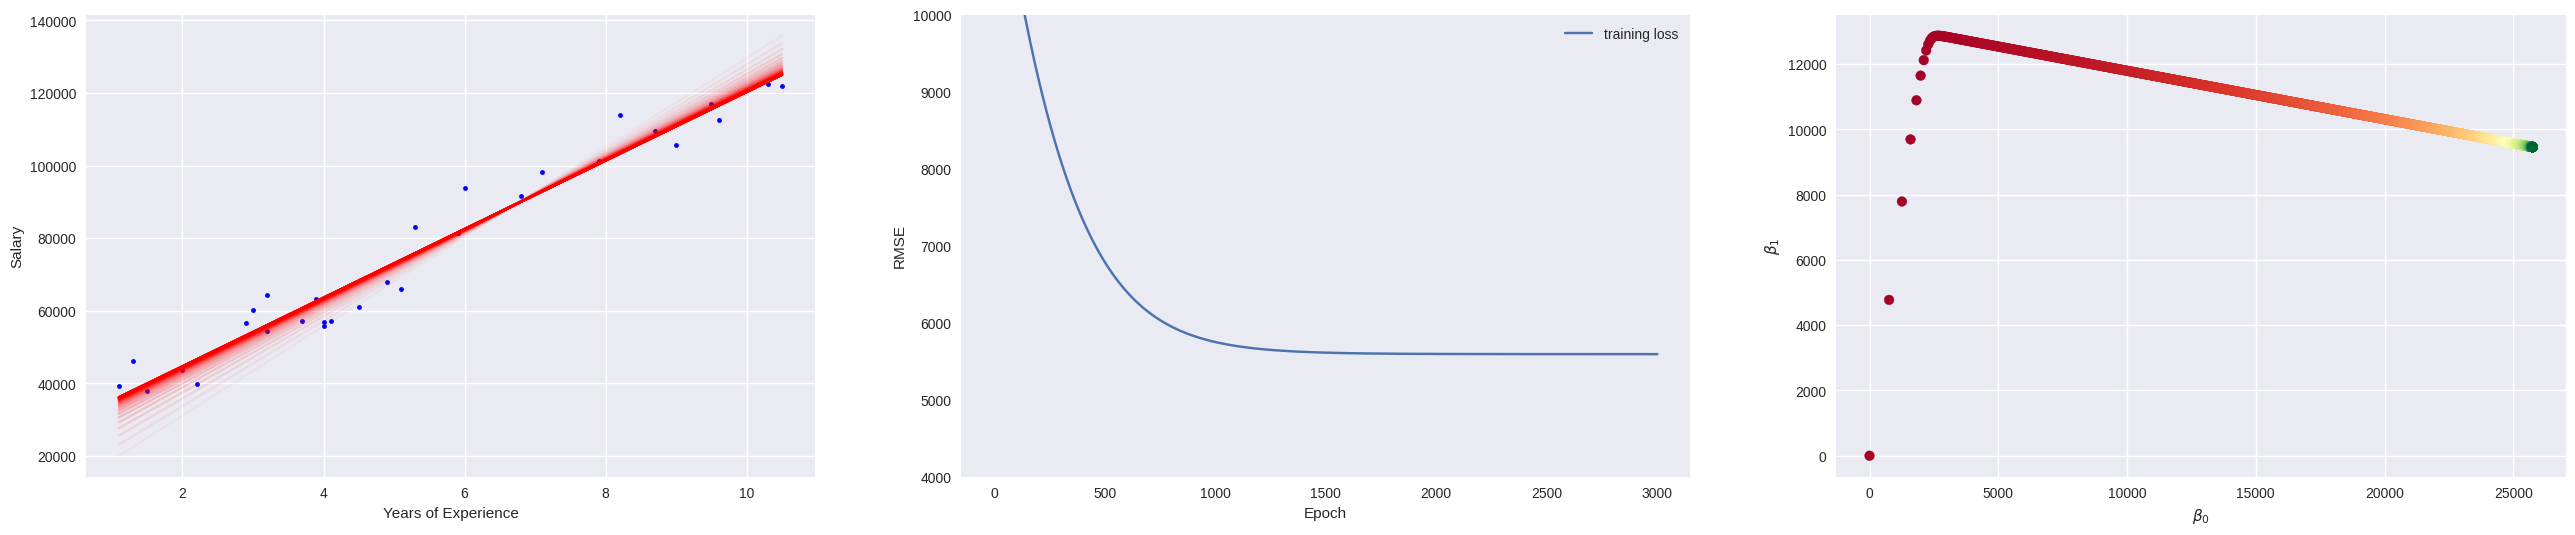

In [20]:
learning_rate = 0.01
epochs = 3000

beta_all, rmse_all, axs = run_gradient_descent_epochs(
    gradient_descent, X, y, learning_rate, epochs, verbose=True,
    step_width_output=100
)
axs[1].set_ylim((4000, 10000));

## Effect of Learning Rate on Gradient Descent

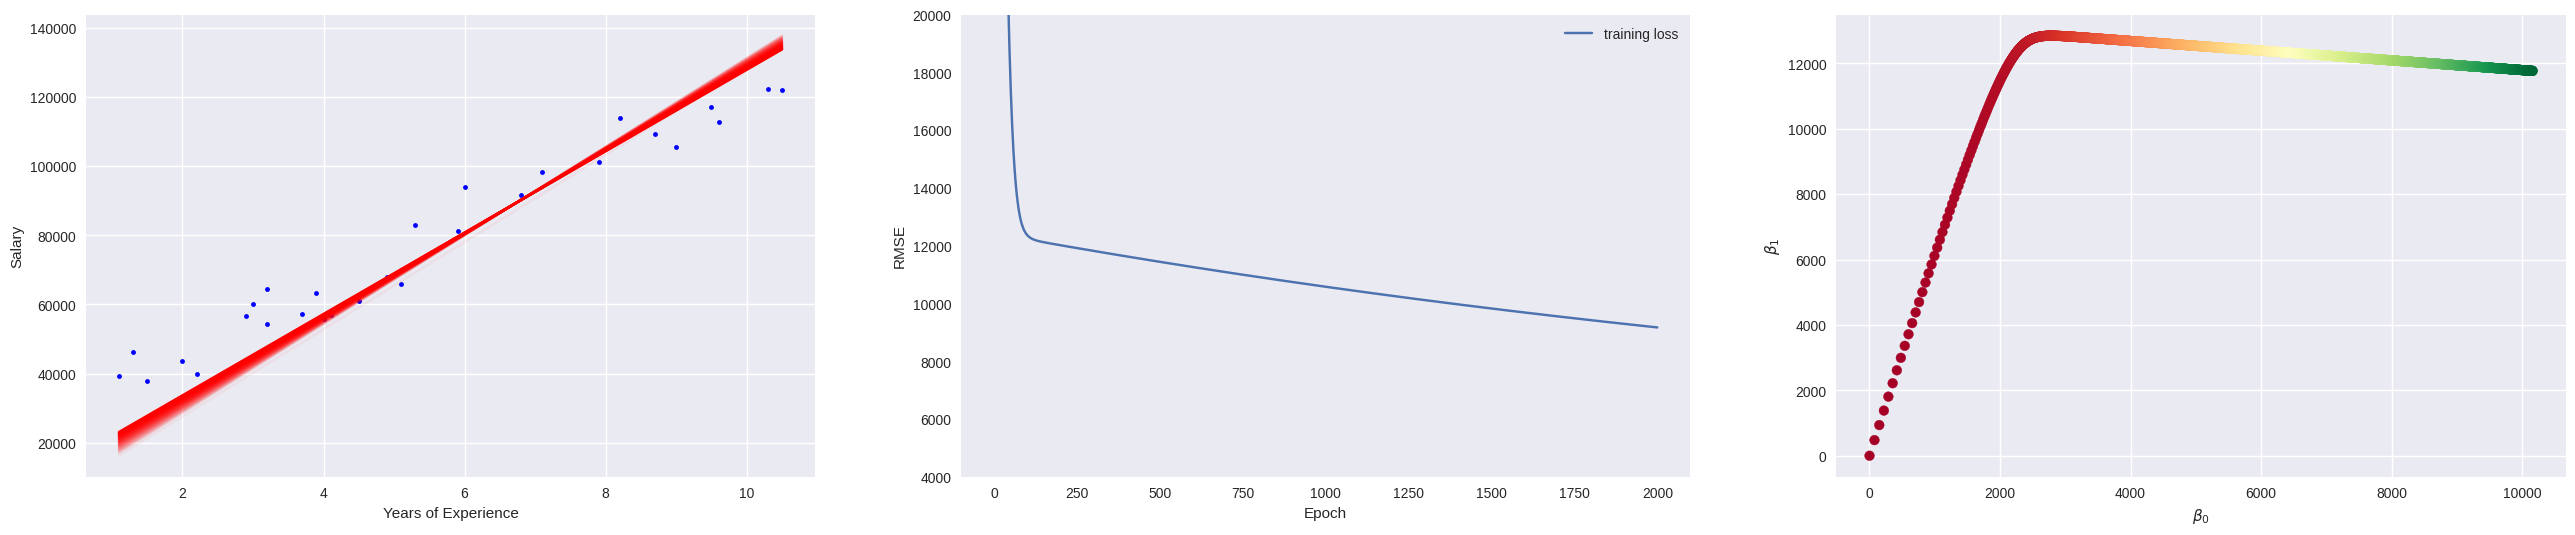

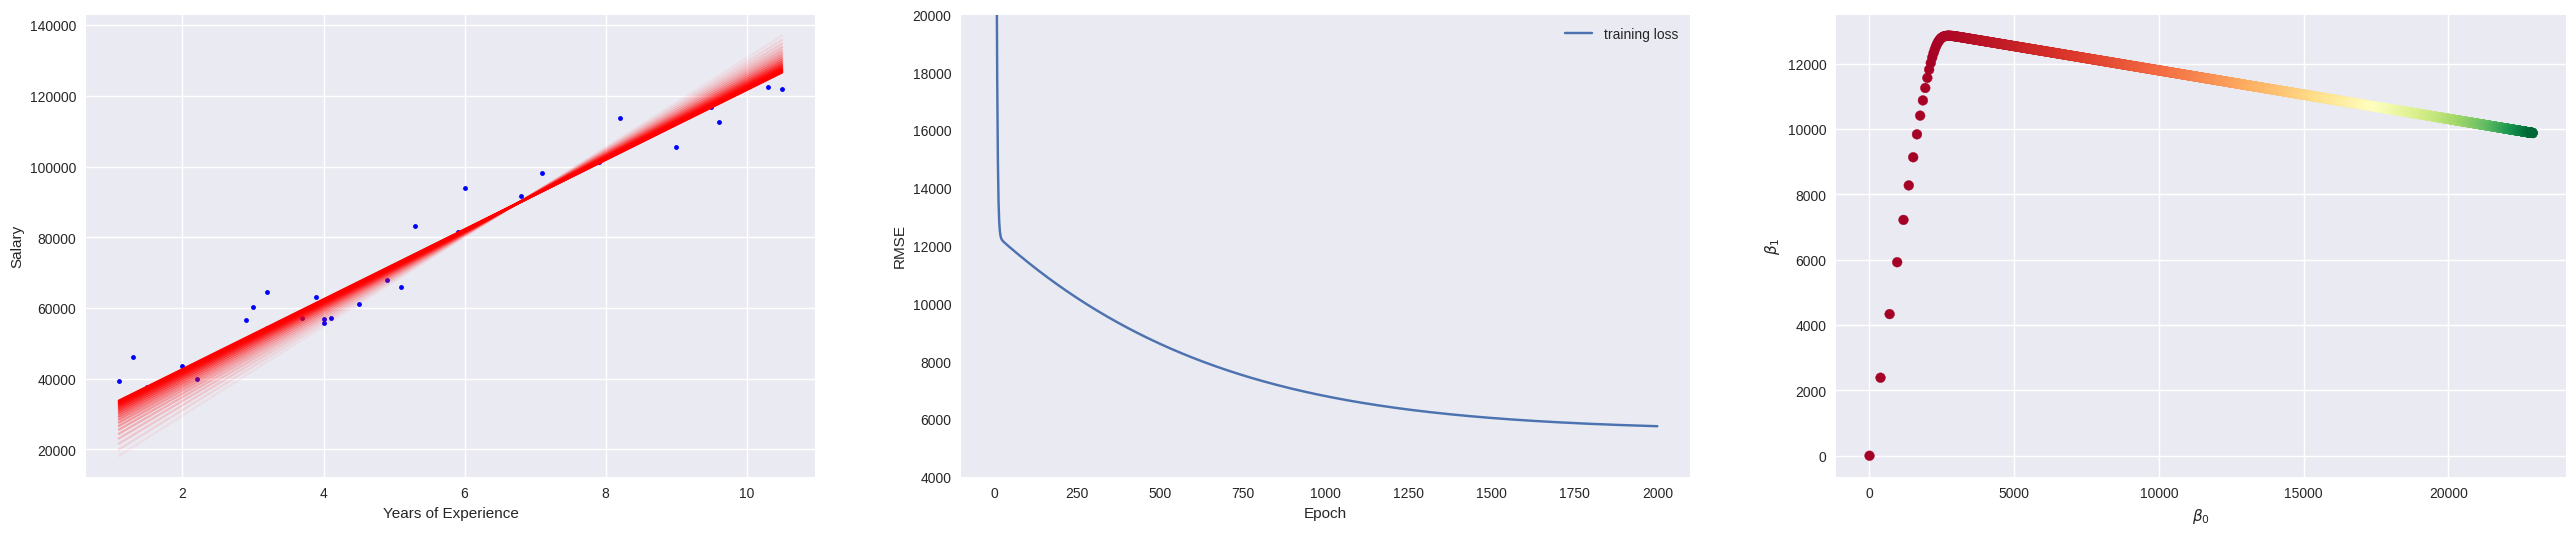

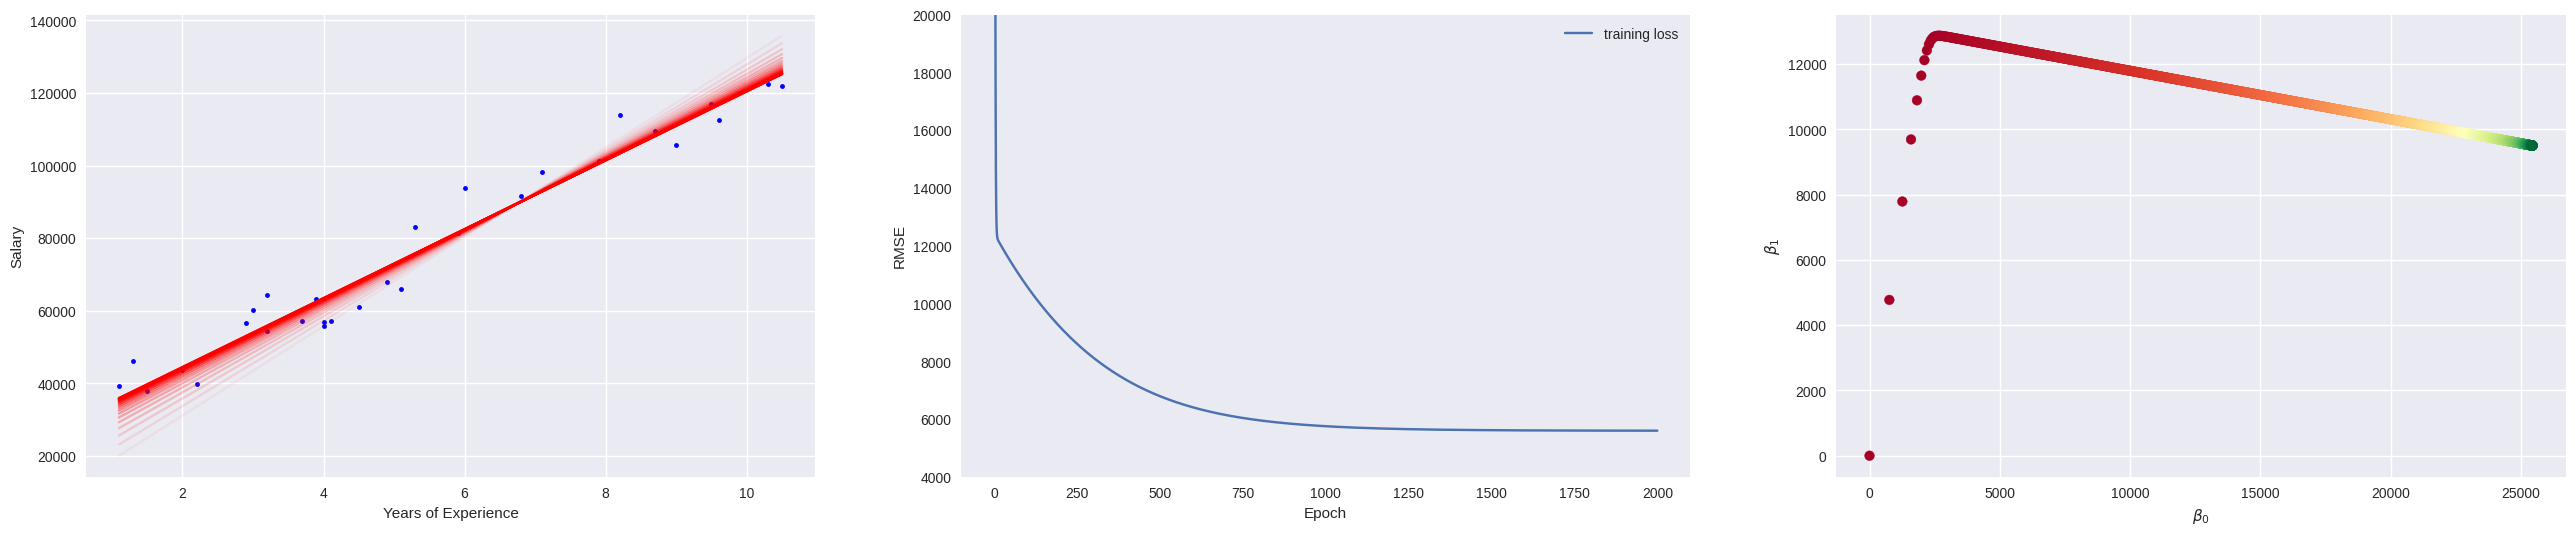

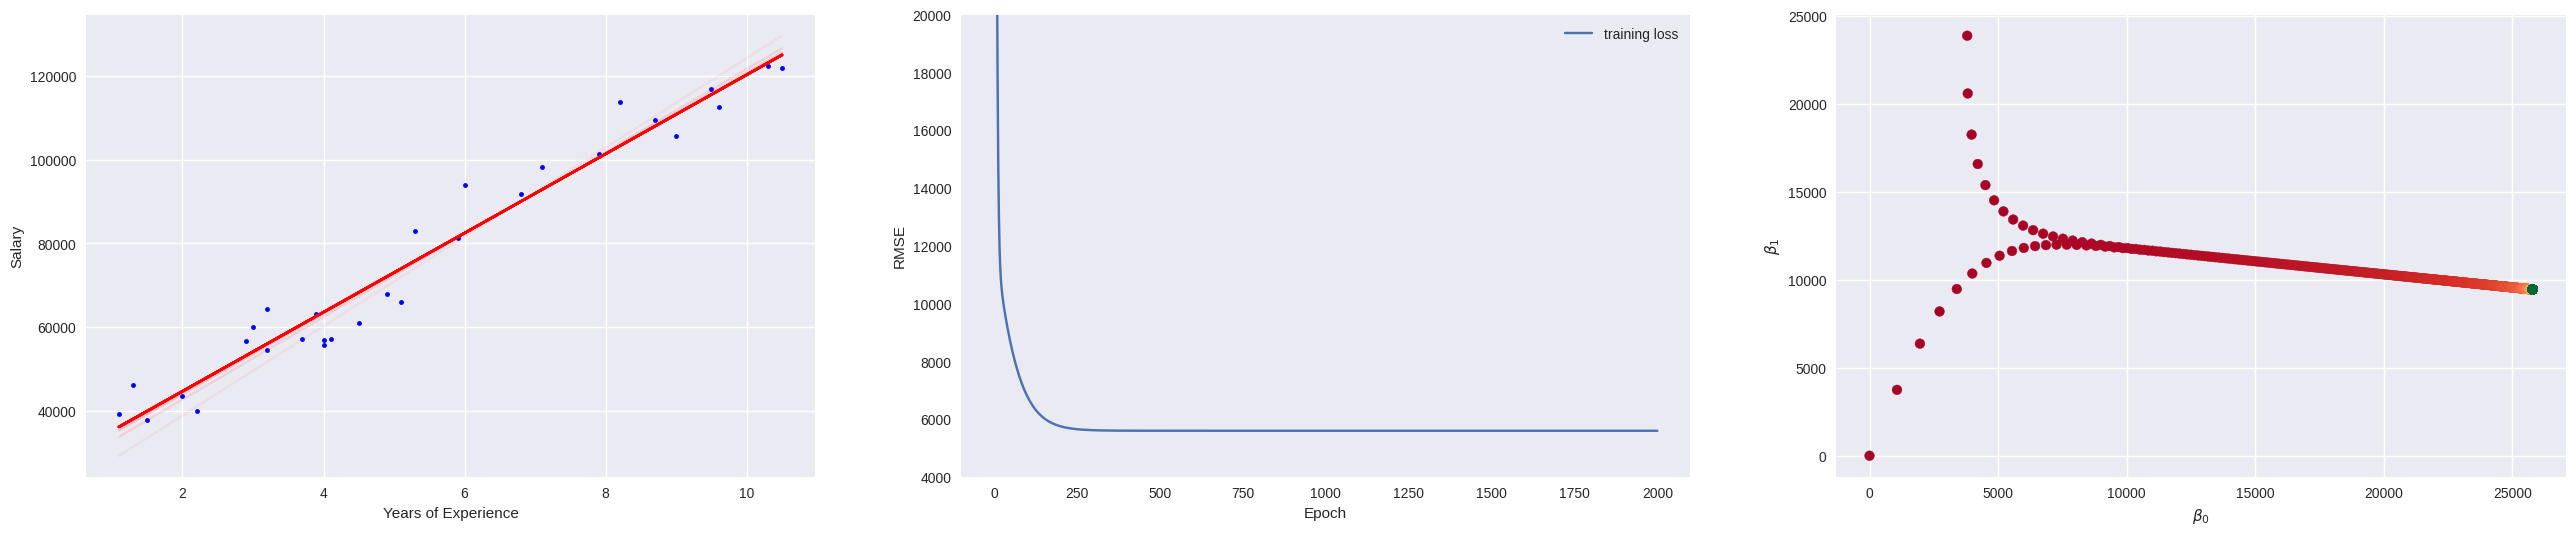

In [21]:
learning_rates = [0.001, 0.005, 0.01, 0.05]
epochs = 2000

beta_lrs = []
rmse_lrs = []
for ind in range(len(learning_rates)):
    learning_rate = learning_rates[ind]
    beta_all, rmse_all, axs = run_gradient_descent_epochs(
        gradient_descent, X, y, learning_rate, epochs, verbose=False
    )
    beta_lrs.append(beta_all)
    rmse_lrs.append(rmse_all)
    axs[1].set_ylim((4000, 20000));

In [22]:
learning_rates

[0.001, 0.005, 0.01, 0.05]

In [23]:
learning_rates[-1], beta_lrs[-1][-1], rmse_lrs[-1][-1]

(0.05, array([25792.20018479,  9449.96232352]), 5592.043608760662)

In [24]:
learning_rates[-2], beta_lrs[-2][-1], rmse_lrs[-2][-1]

(0.01, array([25446.63424434,  9501.24286234]), 5594.351367934913)

In [25]:
learning_rates[0], beta_lrs[0][-1], rmse_lrs[0][-1]

(0.001, array([10161.15078354, 11769.54461405]), 9170.08941554676)

Compare your results with the solver from sklearn.

## Sklearn

In [26]:
X[:5]

array([[1. , 1.1],
       [1. , 1.3],
       [1. , 1.5],
       [1. , 2. ],
       [1. , 2.2]])

In [27]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = LinearRegression(fit_intercept=False)
# Train the model using the training sets
regr.fit(X, y)

LinearRegression(fit_intercept=False)

In [28]:
from sklearn.metrics import mean_squared_error
# Make predictions
y_hat = regr.predict(X)

# Print the coefficients
print("Coefficients: ", [regr.coef_[0]])

# The root mean squared error
RMSE_sklearn = np.sqrt(mean_squared_error(y, y_hat))
print(f"RMSE: {RMSE_sklearn:.2f}")

Coefficients:  [array([25792.20019867,  9449.96232146])]
RMSE: 5592.04


In [ ]:
# how different Gradient Decent RMSE on the last iteration and RMSE from sklearn regression
(rmse_lrs[-1][-1] - RMSE_sklearn) / RMSE_sklearn

0.0

We can see that RMSE from our regression with Gradient Descent is the same from that of sklearn model.

--------------
## End of This Notebook